In [13]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import os

# Define dataset root directory
data_dir = "/content/drive/MyDrive/DataSet/ImageClassification"

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset without predefined train/test split
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Get class names
class_names = dataset.classes
print("Classes:", class_names)


Classes: ['Cars', 'Cricket ball', 'Ice cream cone']


In [14]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split

# Define dataset transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset (without train/test split)
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split 80% Training / 20% Validation
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✅ Dataset Loaded! Training: {len(train_dataset)}, Validation: {len(val_dataset)}")


✅ Dataset Loaded! Training: 772, Validation: 193


In [15]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet-50 (pretrained)
model = models.resnet50(pretrained=True)

# Modify the final layer for 3 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)

# Move model to device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


In [16]:
EPOCHS = 10

# Store loss & accuracy
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []



In [18]:
# Check if train_loader has data
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"Batch Size: {images.shape}, Labels: {labels}")


Batch Size: torch.Size([32, 3, 224, 224]), Labels: tensor([1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1,
        2, 0, 0, 1, 0, 1, 0, 2])


In [19]:
print(f"Using Device: {device}")
print(f"Model Device: {next(model.parameters()).device}")

# Move model to device if not already
model.to(device)


Using Device: cuda
Model Device: cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
import os
print(os.listdir('/content/drive/MyDrive/DataSet/ImageClassification/'))


['Ice cream cone', 'Cars', 'Cricket ball']


In [20]:
print(f"Number of batches in train_loader: {len(train_loader)}")


Number of batches in train_loader: 25


In [22]:
# Print weights before update
print("Before update:", model.fc.weight[0][0].item())

optimizer.zero_grad()
outputs = model(images.to(device))
loss = criterion(outputs, labels.to(device))
loss.backward()
optimizer.step()

# Print weights after update
print("After update:", model.fc.weight[0][0].item())


Before update: -0.01314866729080677
After update: -0.013276209123432636


In [23]:
print(f"Model in training mode: {model.training}")  # Should print True


Model in training mode: True


In [24]:
for epoch in range(EPOCHS):
    # Training
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)



In [25]:
    # Validation
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [10/10], Train Loss: 0.0188, Train Acc: 100.00%, Val Loss: 0.0042, Val Acc: 100.00%


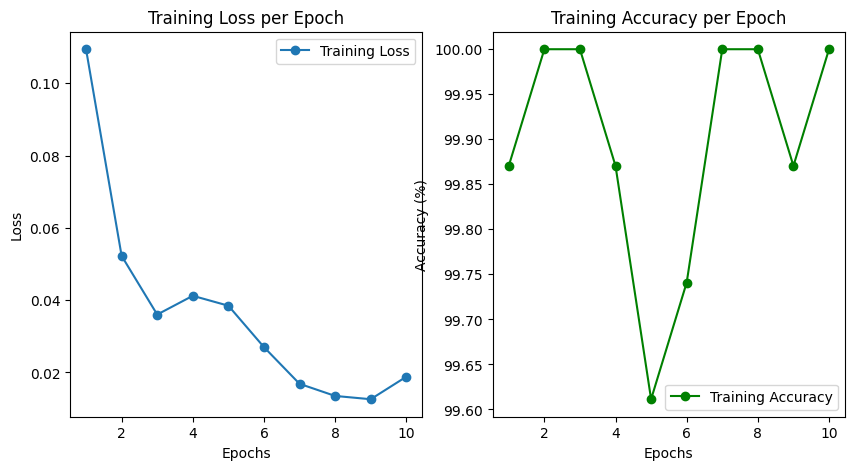

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)  # Ensure x-axis matches

plt.figure(figsize=(10, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.show()
